In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
#import shap
import lime
from lime import lime_tabular
#shap.initjs()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
#import plotly.offline as pyo
#pio.renderers.default='notebook'
import math

## Machine Learning Packages
from sklearn.model_selection import train_test_split
import eli5
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score,roc_curve,
accuracy_score, f1_score, precision_score, recall_score, auc)
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
import joblib

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

import os
import tensorflow as tf

print(tf.test.is_built_with_cuda())
print(tf.config.list_physical_devices('GPU'))

os.environ['CUDA_VISIBLE_DEVICES'] = "1"

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

# print(tf.config.list_physical_devices('GPU'))
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
import tensorflow_data_validation as tfdv

True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU found


In [2]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf
if not tf.test.gpu_device_name(): 
    warnings.warn('No GPU found')
else: 
    print('Default GPU device: {}' .format(tf.test.gpu_device_name()))

Default GPU device: /device:GPU:0


In [19]:
filepath = r"C:\Users\Mudas\Documents\school\Pace\Deep Learning\Project 3\pets"
#p = tf.keras.preprocessing.image_dataset_from_directory(filepath)

In [20]:
import os
num_skipped = 0
for folder_name in ("Cat" , "Dog"):
    folder_path = os.path.join(filepath, folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path,fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
                fobj.close()
        if not is_jfif:
            num_skipped += 1
            os.remove(fpath)
print("Deleted %d images" % num_skipped)

Deleted 1578 images


In [21]:
import splitfolders
output = r"C:\Users\Mudas\Documents\school\Pace\Deep Learning\Project 3\pets"
t = splitfolders.ratio(filepath, output = output, seed=42, ratio=(.8, .1, .1))

Copying files: 23424 files [00:15, 1532.10 files/s]


In [3]:
train_path= r"C:\Users\Mudas\Documents\school\Pace\Deep Learning\Project 3\pets\train"
test_path= r"C:\Users\Mudas\Documents\school\Pace\Deep Learning\Project 3\pets\test"
val_path=r"C:\Users\Mudas\Documents\school\Pace\Deep Learning\Project 3\pets\val"

img_height = 256
img_width = 256
batch_size = 64

train = tf.keras.preprocessing.image_dataset_from_directory( train_path, labels='inferred', label_mode='int', image_size=(img_height, img_width), batch_size=batch_size)
val = tf.keras.preprocessing.image_dataset_from_directory( val_path, labels='inferred', label_mode='int', image_size=(img_height, img_width), batch_size=batch_size)
test = tf.keras.preprocessing.image_dataset_from_directory( test_path, labels='inferred', label_mode='int', image_size=(img_height, img_width), batch_size=batch_size)

Found 18737 files belonging to 2 classes.
Found 2341 files belonging to 2 classes.
Found 2344 files belonging to 2 classes.


In [4]:
train.class_names

['Cat', 'Dog']

# Built Model

### RMSPROP

In [43]:
non_multi = {}
dropout = {}
multi_dropout = {}

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = tf.keras.models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(64, (3,3) , activation = 'relu' , input_shape = (256,256,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

lossf = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss=lossf, metrics = ['AUC' , 'accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.05, patience = 3, min_lr = 0.001)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1032256)           0         
                                                                 
 dense (Dense)               (None, 1)                 1032257   
                                                                 
Total params: 1,034,049
Trainable params: 1,034,049
Non-trainable params: 0
______________________________________________

In [5]:
history = model.fit(train , epochs = 50, batch_size = 1000, callbacks=[callback,lr_callback], validation_data = val)

Epoch 1/50
293/293 [==============================] - 46s 144ms/step - loss: 1.7053 - auc: 0.6601 - accuracy: 0.6377 - val_loss: 0.5791 - val_auc: 0.7816 - val_accuracy: 0.7189 - lr: 0.0010
Epoch 2/50
293/293 [==============================] - 41s 140ms/step - loss: 0.5273 - auc: 0.8225 - accuracy: 0.7468 - val_loss: 0.6687 - val_auc: 0.7955 - val_accuracy: 0.6839 - lr: 0.0010
Epoch 3/50
293/293 [==============================] - 41s 140ms/step - loss: 0.4132 - auc: 0.8945 - accuracy: 0.8132 - val_loss: 0.6027 - val_auc: 0.8023 - val_accuracy: 0.7270 - lr: 0.0010
Epoch 4/50
293/293 [==============================] - 42s 142ms/step - loss: 0.3274 - auc: 0.9387 - accuracy: 0.8681 - val_loss: 0.6766 - val_auc: 0.7833 - val_accuracy: 0.7104 - lr: 0.0010


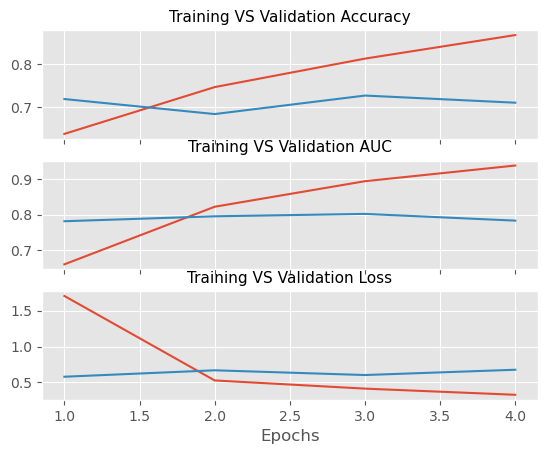

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

auc_ = history.history['auc']
val_auc = history.history['val_auc']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(1,len(acc)+1)
fig, axs = plt.subplots(3, 1)
axs[0].plot(epochs_range, acc, label='Training accuracy')
axs[0].plot(epochs_range, val_acc, label='Validation accuracy')
axs[0].set_title('Training VS Validation Accuracy', loc = 'center', size = 11)
axs[1].plot(epochs_range, auc_, label='Training AUC')
axs[1].plot(epochs_range, val_auc, label='Validation AUC')
axs[1].set_title('Training VS Validation AUC',loc = 'center', size = 11)
axs[2].plot(epochs_range, loss, label='Training Loss')
axs[2].plot(epochs_range, val_loss, label='Validation Loss')
axs[2].set_title('Training VS Validation Loss',loc = 'center', size = 11)
for ax in axs.flat:
    ax.set(xlabel='Epochs')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [7]:
test_loss, test_auc, test_acc = model.evaluate(test)
print('loss metric:',test_loss)
print('roc auc score:',test_auc)
print('accuracy score:',test_acc)

non_multi['rmsprop_auc'] = test_auc
non_multi['rmsprop_accuracy'] = test_acc
non_multi['rmsprop_loss'] = test_loss

37/37 [==============================] - 2s 51ms/step - loss: 0.7327 - auc: 0.7679 - accuracy: 0.6920
loss metric: 0.7327478528022766
roc auc score: 0.7679376602172852
accuracy score: 0.6919795274734497


In [8]:
model = tf.keras.models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(64, (3,3) , activation = 'relu' , input_shape = (256,256,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

lossf = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss=lossf, metrics = ['AUC' , 'accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.05, patience = 3, min_lr = 0.001)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 127, 127, 64)      0         
                                                                 
 flatten_1 (Flatten)         (None, 1032256)           0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1032257   
                                                      

In [9]:
history = model.fit(train , epochs = 50, batch_size = 1000, callbacks=[callback,lr_callback], validation_data = val)

Epoch 1/50
293/293 [==============================] - 45s 152ms/step - loss: 1.1859 - auc: 0.6880 - accuracy: 0.6501 - val_loss: 0.5764 - val_auc: 0.7705 - val_accuracy: 0.7006 - lr: 0.0010
Epoch 2/50
293/293 [==============================] - 44s 151ms/step - loss: 0.5119 - auc: 0.8340 - accuracy: 0.7604 - val_loss: 0.5620 - val_auc: 0.8011 - val_accuracy: 0.7211 - lr: 0.0010
Epoch 3/50
293/293 [==============================] - 45s 152ms/step - loss: 0.3954 - auc: 0.9059 - accuracy: 0.8245 - val_loss: 0.6872 - val_auc: 0.7580 - val_accuracy: 0.6873 - lr: 0.0010
Epoch 4/50
293/293 [==============================] - 45s 153ms/step - loss: 0.3047 - auc: 0.9467 - accuracy: 0.8737 - val_loss: 0.6308 - val_auc: 0.7955 - val_accuracy: 0.7236 - lr: 0.0010
Epoch 5/50
293/293 [==============================] - 45s 153ms/step - loss: 0.2340 - auc: 0.9704 - accuracy: 0.9130 - val_loss: 0.7637 - val_auc: 0.7745 - val_accuracy: 0.6997 - lr: 0.0010


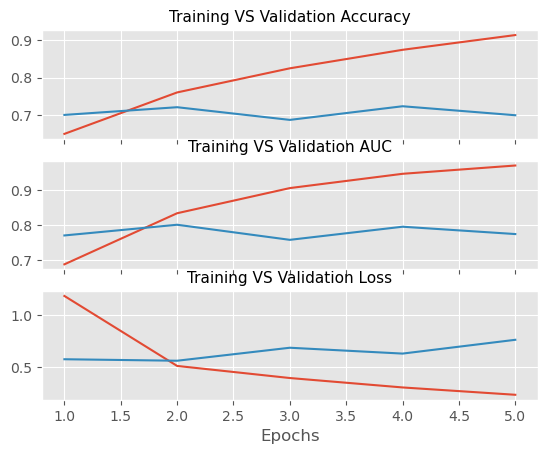

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

auc_ = history.history['auc']
val_auc = history.history['val_auc']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(1,len(acc)+1)
fig, axs = plt.subplots(3, 1)
axs[0].plot(epochs_range, acc, label='Training accuracy')
axs[0].plot(epochs_range, val_acc, label='Validation accuracy')
axs[0].set_title('Training VS Validation Accuracy', loc = 'center', size = 11)
axs[1].plot(epochs_range, auc_, label='Training AUC')
axs[1].plot(epochs_range, val_auc, label='Validation AUC')
axs[1].set_title('Training VS Validation AUC',loc = 'center', size = 11)
axs[2].plot(epochs_range, loss, label='Training Loss')
axs[2].plot(epochs_range, val_loss, label='Validation Loss')
axs[2].set_title('Training VS Validation Loss',loc = 'center', size = 11)
for ax in axs.flat:
    ax.set(xlabel='Epochs')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [11]:
test_loss, test_auc, test_acc = model.evaluate(test)
print('loss metric:',test_loss)
print('roc auc score:',test_auc)
print('accuracy score:',test_acc)

dropout['rmsprop_auc'] = test_auc
dropout['rmsprop_accuracy'] = test_acc
dropout['rmsprop_loss'] = test_loss

37/37 [==============================] - 2s 47ms/step - loss: 0.7941 - auc: 0.7773 - accuracy: 0.7073
loss metric: 0.794090747833252
roc auc score: 0.7772845029830933
accuracy score: 0.7073378562927246


In [44]:
model = tf.keras.models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(16, (3,3) , activation = 'relu' , input_shape = (256,256,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3),activation = 'relu' ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3),activation = 'relu' ),
    tf.keras.layers.MaxPooling2D(2,2),
        layers.Dropout(.2),
    tf.keras.layers.Flatten(),
    layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

lossf = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss=lossf, metrics = ['AUC' , 'accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.05, patience = 3, min_lr = 0.001)

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 64)       

In [45]:
history = model.fit(train , epochs = 50, batch_size = 1000, callbacks=[callback,lr_callback], validation_data = val)

Epoch 1/50
293/293 [==============================] - 26s 86ms/step - loss: 0.6823 - auc: 0.6990 - accuracy: 0.6435 - val_loss: 0.5326 - val_auc: 0.8049 - val_accuracy: 0.7223 - lr: 0.0010
Epoch 2/50
293/293 [==============================] - 26s 87ms/step - loss: 0.5101 - auc: 0.8295 - accuracy: 0.7494 - val_loss: 0.4981 - val_auc: 0.8652 - val_accuracy: 0.7437 - lr: 0.0010
Epoch 3/50
293/293 [==============================] - 25s 85ms/step - loss: 0.4288 - auc: 0.8843 - accuracy: 0.8013 - val_loss: 0.4894 - val_auc: 0.8801 - val_accuracy: 0.7727 - lr: 0.0010
Epoch 4/50
293/293 [==============================] - 25s 85ms/step - loss: 0.3607 - auc: 0.9201 - accuracy: 0.8410 - val_loss: 0.5405 - val_auc: 0.8837 - val_accuracy: 0.7890 - lr: 0.0010
Epoch 5/50
293/293 [==============================] - 25s 85ms/step - loss: 0.2883 - auc: 0.9495 - accuracy: 0.8777 - val_loss: 0.4996 - val_auc: 0.8889 - val_accuracy: 0.7954 - lr: 0.0010
Epoch 6/50
293/293 [==============================] - 2

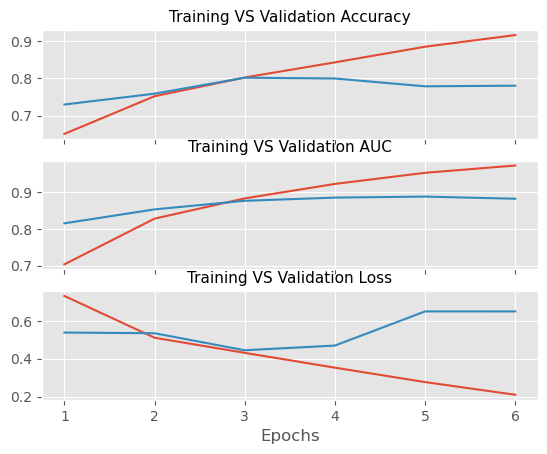

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

auc_ = history.history['auc']
val_auc = history.history['val_auc']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(1,len(acc)+1)
fig, axs = plt.subplots(3, 1)
axs[0].plot(epochs_range, acc, label='Training accuracy')
axs[0].plot(epochs_range, val_acc, label='Validation accuracy')
axs[0].set_title('Training VS Validation Accuracy', loc = 'center', size = 11)
axs[1].plot(epochs_range, auc_, label='Training AUC')
axs[1].plot(epochs_range, val_auc, label='Validation AUC')
axs[1].set_title('Training VS Validation AUC',loc = 'center', size = 11)
axs[2].plot(epochs_range, loss, label='Training Loss')
axs[2].plot(epochs_range, val_loss, label='Validation Loss')
axs[2].set_title('Training VS Validation Loss',loc = 'center', size = 11)
for ax in axs.flat:
    ax.set(xlabel='Epochs')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [46]:
test_loss, test_auc, test_acc = model.evaluate(test)
print('loss metric:',test_loss)
print('roc auc score:',test_auc)
print('accuracy score:',test_acc)

multi_dropout['rmsprop_auc'] = test_auc
multi_dropout['rmsprop_accuracy'] = test_acc
multi_dropout['rmsprop_loss'] = test_loss

37/37 [==============================] - 1s 36ms/step - loss: 0.7846 - auc: 0.8796 - accuracy: 0.8003
loss metric: 0.7845999002456665
roc auc score: 0.8796347379684448
accuracy score: 0.8003413081169128


# Adam

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = tf.keras.models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(64, (3,3) , activation = 'relu' , input_shape = (256,256,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

lossf = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=lossf, metrics = ['AUC' , 'accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.05, patience = 3, min_lr = 0.001)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1032256)           0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1032257   
                                                                 
Total params: 1,034,049
Trainable params: 1,034,049
Non-trainable params: 0
____________________________________________

In [18]:
history = model.fit(train , epochs = 50, batch_size = 1000, callbacks=[callback,lr_callback], validation_data = val)

Epoch 1/50
293/293 [==============================] - 41s 140ms/step - loss: 1.0837 - auc: 0.6458 - accuracy: 0.6080 - val_loss: 0.6063 - val_auc: 0.7464 - val_accuracy: 0.6865 - lr: 0.0010
Epoch 2/50
293/293 [==============================] - 41s 141ms/step - loss: 0.5490 - auc: 0.7976 - accuracy: 0.7225 - val_loss: 0.5659 - val_auc: 0.7841 - val_accuracy: 0.7215 - lr: 0.0010
Epoch 3/50
293/293 [==============================] - 42s 142ms/step - loss: 0.4401 - auc: 0.8829 - accuracy: 0.7974 - val_loss: 0.6037 - val_auc: 0.7878 - val_accuracy: 0.6980 - lr: 0.0010
Epoch 4/50
293/293 [==============================] - 42s 142ms/step - loss: 0.3426 - auc: 0.9354 - accuracy: 0.8563 - val_loss: 0.5875 - val_auc: 0.7918 - val_accuracy: 0.7147 - lr: 0.0010
Epoch 5/50
293/293 [==============================] - 42s 142ms/step - loss: 0.2636 - auc: 0.9659 - accuracy: 0.8984 - val_loss: 0.6749 - val_auc: 0.7900 - val_accuracy: 0.7087 - lr: 0.0010


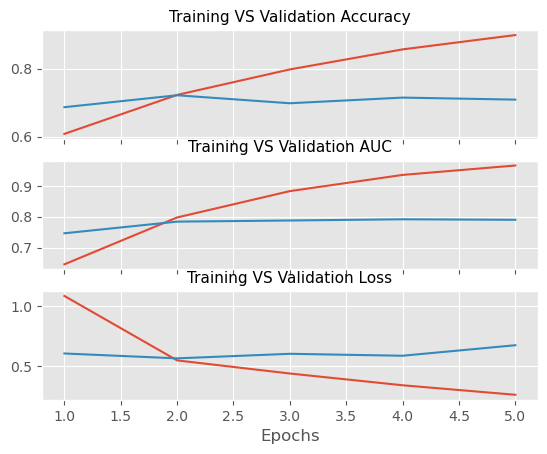

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

auc_ = history.history['auc']
val_auc = history.history['val_auc']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(1,len(acc)+1)
fig, axs = plt.subplots(3, 1)
axs[0].plot(epochs_range, acc, label='Training accuracy')
axs[0].plot(epochs_range, val_acc, label='Validation accuracy')
axs[0].set_title('Training VS Validation Accuracy', loc = 'center', size = 11)
axs[1].plot(epochs_range, auc_, label='Training AUC')
axs[1].plot(epochs_range, val_auc, label='Validation AUC')
axs[1].set_title('Training VS Validation AUC',loc = 'center', size = 11)
axs[2].plot(epochs_range, loss, label='Training Loss')
axs[2].plot(epochs_range, val_loss, label='Validation Loss')
axs[2].set_title('Training VS Validation Loss',loc = 'center', size = 11)
for ax in axs.flat:
    ax.set(xlabel='Epochs')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [20]:
test_loss, test_auc, test_acc = model.evaluate(test)
print('loss metric:',test_loss)
print('roc auc score:',test_auc)
print('accuracy score:',test_acc)

non_multi['adam_auc'] = test_auc
non_multi['adam_accuracy'] = test_acc
non_multi['adam_loss'] = test_loss

37/37 [==============================] - 2s 48ms/step - loss: 0.7130 - auc: 0.7810 - accuracy: 0.7065
loss metric: 0.7130265831947327
roc auc score: 0.7810093760490417
accuracy score: 0.7064846158027649


In [21]:
model = tf.keras.models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(64, (3,3) , activation = 'relu' , input_shape = (256,256,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

lossf = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=lossf, metrics = ['AUC' , 'accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.05, patience = 3, min_lr = 0.001)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 127, 127, 64)      0         
                                                                 
 flatten_4 (Flatten)         (None, 1032256)           0         
                                                                 
 dense_5 (Dense)             (None, 1)                 1032257   
                                                      

In [22]:
history = model.fit(train , epochs = 50, batch_size = 1000, callbacks=[callback,lr_callback], validation_data = val)

Epoch 1/50
293/293 [==============================] - 45s 151ms/step - loss: 1.1893 - auc: 0.6637 - accuracy: 0.6259 - val_loss: 0.6002 - val_auc: 0.7670 - val_accuracy: 0.6907 - lr: 0.0010
Epoch 2/50
293/293 [==============================] - 44s 151ms/step - loss: 0.5136 - auc: 0.8302 - accuracy: 0.7527 - val_loss: 0.5652 - val_auc: 0.7901 - val_accuracy: 0.7219 - lr: 0.0010
Epoch 3/50
293/293 [==============================] - 44s 151ms/step - loss: 0.4252 - auc: 0.8911 - accuracy: 0.8088 - val_loss: 0.5790 - val_auc: 0.7949 - val_accuracy: 0.7134 - lr: 0.0010
Epoch 4/50
293/293 [==============================] - 44s 151ms/step - loss: 0.3309 - auc: 0.9403 - accuracy: 0.8632 - val_loss: 0.6035 - val_auc: 0.7948 - val_accuracy: 0.7219 - lr: 0.0010
Epoch 5/50
293/293 [==============================] - 45s 152ms/step - loss: 0.2534 - auc: 0.9692 - accuracy: 0.9024 - val_loss: 0.6576 - val_auc: 0.7918 - val_accuracy: 0.7151 - lr: 0.0010


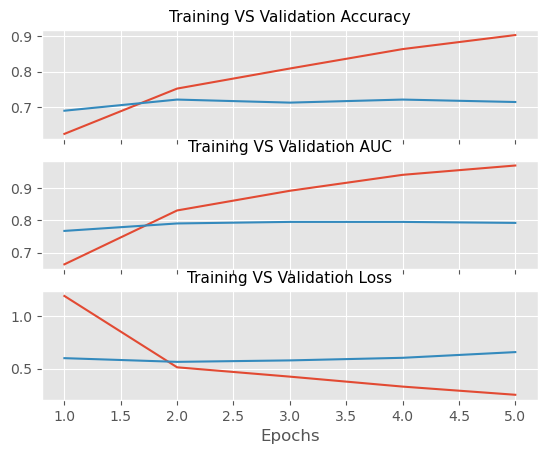

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

auc_ = history.history['auc']
val_auc = history.history['val_auc']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(1,len(acc)+1)
fig, axs = plt.subplots(3, 1)
axs[0].plot(epochs_range, acc, label='Training accuracy')
axs[0].plot(epochs_range, val_acc, label='Validation accuracy')
axs[0].set_title('Training VS Validation Accuracy', loc = 'center', size = 11)
axs[1].plot(epochs_range, auc_, label='Training AUC')
axs[1].plot(epochs_range, val_auc, label='Validation AUC')
axs[1].set_title('Training VS Validation AUC',loc = 'center', size = 11)
axs[2].plot(epochs_range, loss, label='Training Loss')
axs[2].plot(epochs_range, val_loss, label='Validation Loss')
axs[2].set_title('Training VS Validation Loss',loc = 'center', size = 11)
for ax in axs.flat:
    ax.set(xlabel='Epochs')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [24]:
test_loss, test_auc, test_acc = model.evaluate(test)
print('loss metric:',test_loss)
print('roc auc score:',test_auc)
print('accuracy score:',test_acc)

dropout['adam_auc'] = test_auc
dropout['adam_accuracy'] = test_acc
dropout['adam_loss'] = test_loss

37/37 [==============================] - 2s 47ms/step - loss: 0.6768 - auc: 0.7880 - accuracy: 0.7193
loss metric: 0.6768108010292053
roc auc score: 0.7879955172538757
accuracy score: 0.7192832827568054


In [47]:
model = tf.keras.models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(16, (3,3) , activation = 'relu' , input_shape = (256,256,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3),activation = 'relu' ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3),activation = 'relu' ),
    tf.keras.layers.MaxPooling2D(2,2),
        layers.Dropout(.2),
    tf.keras.layers.Flatten(),
    layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

lossf = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=lossf, metrics = ['AUC' , 'accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.05, patience = 3, min_lr = 0.001)

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 64)      

In [48]:
history = model.fit(train , epochs = 50, batch_size = 1000, callbacks=[callback,lr_callback], validation_data = val)

Epoch 1/50
293/293 [==============================] - 25s 83ms/step - loss: 0.5973 - auc: 0.7497 - accuracy: 0.6793 - val_loss: 0.4920 - val_auc: 0.8438 - val_accuracy: 0.7578 - lr: 0.0010
Epoch 2/50
293/293 [==============================] - 24s 83ms/step - loss: 0.4641 - auc: 0.8621 - accuracy: 0.7794 - val_loss: 0.4490 - val_auc: 0.8713 - val_accuracy: 0.7881 - lr: 0.0010
Epoch 3/50
293/293 [==============================] - 25s 84ms/step - loss: 0.3997 - auc: 0.9001 - accuracy: 0.8161 - val_loss: 0.4504 - val_auc: 0.8804 - val_accuracy: 0.7992 - lr: 0.0010
Epoch 4/50
293/293 [==============================] - 25s 84ms/step - loss: 0.3278 - auc: 0.9344 - accuracy: 0.8591 - val_loss: 0.4346 - val_auc: 0.8935 - val_accuracy: 0.8159 - lr: 0.0010
Epoch 5/50
293/293 [==============================] - 25s 85ms/step - loss: 0.2518 - auc: 0.9620 - accuracy: 0.8935 - val_loss: 0.5096 - val_auc: 0.8810 - val_accuracy: 0.7992 - lr: 0.0010
Epoch 6/50
293/293 [==============================] - 2

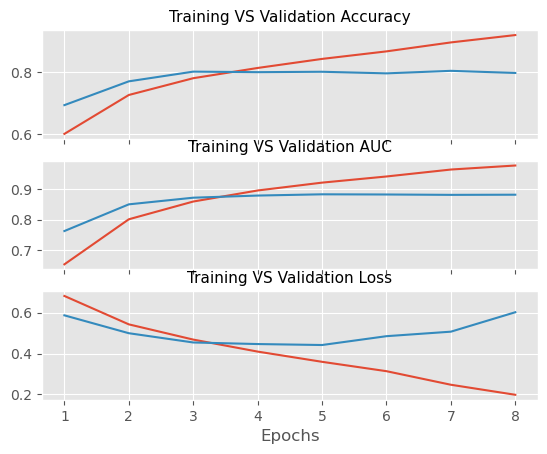

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

auc_ = history.history['auc']
val_auc = history.history['val_auc']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(1,len(acc)+1)
fig, axs = plt.subplots(3, 1)
axs[0].plot(epochs_range, acc, label='Training accuracy')
axs[0].plot(epochs_range, val_acc, label='Validation accuracy')
axs[0].set_title('Training VS Validation Accuracy', loc = 'center', size = 11)
axs[1].plot(epochs_range, auc_, label='Training AUC')
axs[1].plot(epochs_range, val_auc, label='Validation AUC')
axs[1].set_title('Training VS Validation AUC',loc = 'center', size = 11)
axs[2].plot(epochs_range, loss, label='Training Loss')
axs[2].plot(epochs_range, val_loss, label='Validation Loss')
axs[2].set_title('Training VS Validation Loss',loc = 'center', size = 11)
for ax in axs.flat:
    ax.set(xlabel='Epochs')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [49]:
test_loss, test_auc, test_acc = model.evaluate(test)
print('loss metric:',test_loss)
print('roc auc score:',test_auc)
print('accuracy score:',test_acc)



multi_dropout['adam_auc'] = test_auc
multi_dropout['adam_accuracy'] = test_acc
multi_dropout['adam_loss'] = test_loss

37/37 [==============================] - 1s 37ms/step - loss: 0.6713 - auc: 0.8805 - accuracy: 0.8067
loss metric: 0.6713283658027649
roc auc score: 0.8805394768714905
accuracy score: 0.8067406415939331


# Stochastic Gradient

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = tf.keras.models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(64, (3,3) , activation = 'relu' , input_shape = (256,256,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

lossf = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss=lossf, metrics = ['AUC' , 'accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.05, patience = 3, min_lr = 0.001)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1032256)           0         
                                                                 
 dense_8 (Dense)             (None, 1)                 1032257   
                                                                 
Total params: 1,034,049
Trainable params: 1,034,049
Non-trainable params: 0
____________________________________________

In [30]:
history = model.fit(train , epochs = 50, batch_size = 1000, callbacks=[callback,lr_callback], validation_data = val)

Epoch 1/50
293/293 [==============================] - 47s 158ms/step - loss: 0.6887 - auc: 0.5784 - accuracy: 0.5570 - val_loss: 0.6811 - val_auc: 0.6580 - val_accuracy: 0.5613 - lr: 0.0010
Epoch 2/50
293/293 [==============================] - 46s 158ms/step - loss: 0.6612 - auc: 0.6377 - accuracy: 0.5939 - val_loss: 0.6593 - val_auc: 0.6755 - val_accuracy: 0.5959 - lr: 0.0010
Epoch 3/50
293/293 [==============================] - 46s 158ms/step - loss: 0.6483 - auc: 0.6629 - accuracy: 0.6126 - val_loss: 0.6455 - val_auc: 0.6855 - val_accuracy: 0.6220 - lr: 0.0010
Epoch 4/50
293/293 [==============================] - 46s 158ms/step - loss: 0.6380 - auc: 0.6829 - accuracy: 0.6284 - val_loss: 0.6348 - val_auc: 0.6949 - val_accuracy: 0.6437 - lr: 0.0010
Epoch 5/50
293/293 [==============================] - 46s 158ms/step - loss: 0.6325 - auc: 0.6926 - accuracy: 0.6353 - val_loss: 0.6322 - val_auc: 0.6988 - val_accuracy: 0.6395 - lr: 0.0010
Epoch 6/50
293/293 [==============================

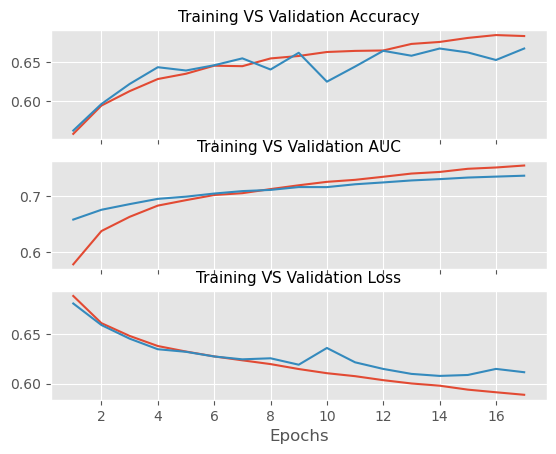

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

auc_ = history.history['auc']
val_auc = history.history['val_auc']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(1,len(acc)+1)
fig, axs = plt.subplots(3, 1)
axs[0].plot(epochs_range, acc, label='Training accuracy')
axs[0].plot(epochs_range, val_acc, label='Validation accuracy')
axs[0].set_title('Training VS Validation Accuracy', loc = 'center', size = 11)
axs[1].plot(epochs_range, auc_, label='Training AUC')
axs[1].plot(epochs_range, val_auc, label='Validation AUC')
axs[1].set_title('Training VS Validation AUC',loc = 'center', size = 11)
axs[2].plot(epochs_range, loss, label='Training Loss')
axs[2].plot(epochs_range, val_loss, label='Validation Loss')
axs[2].set_title('Training VS Validation Loss',loc = 'center', size = 11)
for ax in axs.flat:
    ax.set(xlabel='Epochs')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [32]:
test_loss, test_auc, test_acc = model.evaluate(test)
print('loss metric:',test_loss)
print('roc auc score:',test_auc)
print('accuracy score:',test_acc)

non_multi['SGD_auc'] = test_auc
non_multi['SGD_accuracy'] = test_acc
non_multi['SGD_loss'] = test_loss

37/37 [==============================] - 2s 48ms/step - loss: 0.6083 - auc: 0.7426 - accuracy: 0.6515
loss metric: 0.6082679629325867
roc auc score: 0.7425733804702759
accuracy score: 0.651450514793396


In [33]:
model = tf.keras.models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(64, (3,3) , activation = 'relu' , input_shape = (256,256,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

lossf = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss=lossf, metrics = ['AUC' , 'accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.05, patience = 3, min_lr = 0.001)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 127, 127, 64)      0         
                                                                 
 flatten_7 (Flatten)         (None, 1032256)           0         
                                                                 
 dense_9 (Dense)             (None, 1)                 1032257   
                                                      

In [34]:
history = model.fit(train , epochs = 50, batch_size = 1000, callbacks=[callback,lr_callback], validation_data = val)

Epoch 1/50
293/293 [==============================] - 50s 170ms/step - loss: 0.7711 - auc: 0.5638 - accuracy: 0.5487 - val_loss: 0.6695 - val_auc: 0.6558 - val_accuracy: 0.5827 - lr: 0.0010
Epoch 2/50
293/293 [==============================] - 50s 170ms/step - loss: 0.6604 - auc: 0.6405 - accuracy: 0.5953 - val_loss: 0.6574 - val_auc: 0.6690 - val_accuracy: 0.5955 - lr: 0.0010
Epoch 3/50
293/293 [==============================] - 50s 170ms/step - loss: 0.6495 - auc: 0.6622 - accuracy: 0.6166 - val_loss: 0.6424 - val_auc: 0.6813 - val_accuracy: 0.6224 - lr: 0.0010
Epoch 4/50
293/293 [==============================] - 50s 169ms/step - loss: 0.6400 - auc: 0.6769 - accuracy: 0.6227 - val_loss: 0.6422 - val_auc: 0.6897 - val_accuracy: 0.6262 - lr: 0.0010
Epoch 5/50
293/293 [==============================] - 50s 170ms/step - loss: 0.6340 - auc: 0.6880 - accuracy: 0.6325 - val_loss: 0.6550 - val_auc: 0.6852 - val_accuracy: 0.6015 - lr: 0.0010
Epoch 6/50
293/293 [==============================

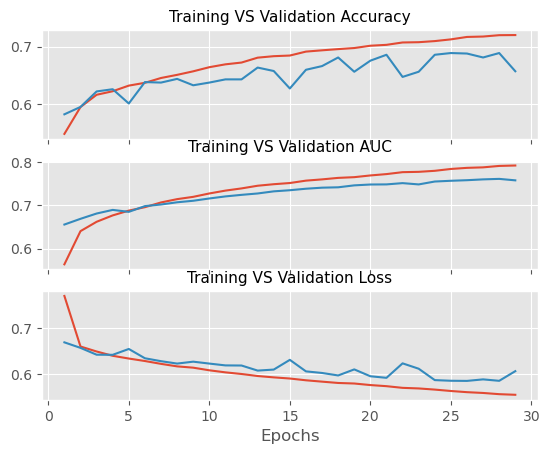

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

auc_ = history.history['auc']
val_auc = history.history['val_auc']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(1,len(acc)+1)
fig, axs = plt.subplots(3, 1)
axs[0].plot(epochs_range, acc, label='Training accuracy')
axs[0].plot(epochs_range, val_acc, label='Validation accuracy')
axs[0].set_title('Training VS Validation Accuracy', loc = 'center', size = 11)
axs[1].plot(epochs_range, auc_, label='Training AUC')
axs[1].plot(epochs_range, val_auc, label='Validation AUC')
axs[1].set_title('Training VS Validation AUC',loc = 'center', size = 11)
axs[2].plot(epochs_range, loss, label='Training Loss')
axs[2].plot(epochs_range, val_loss, label='Validation Loss')
axs[2].set_title('Training VS Validation Loss',loc = 'center', size = 11)
for ax in axs.flat:
    ax.set(xlabel='Epochs')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [36]:
test_loss, test_auc, test_acc = model.evaluate(test)
print('loss metric:',test_loss)
print('roc auc score:',test_auc)
print('accuracy score:',test_acc)

dropout['SGD_auc'] = test_auc
dropout['SGD_accuracy'] = test_acc
dropout['SGD_loss'] = test_loss

37/37 [==============================] - 2s 49ms/step - loss: 0.6036 - auc: 0.7673 - accuracy: 0.6685
loss metric: 0.603634774684906
roc auc score: 0.7672990560531616
accuracy score: 0.6685153841972351


In [50]:
model = tf.keras.models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(16, (3,3) , activation = 'relu' , input_shape = (256,256,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3),activation = 'relu' ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3),activation = 'relu' ),
    tf.keras.layers.MaxPooling2D(2,2),
        layers.Dropout(.2),
    tf.keras.layers.Flatten(),
    layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

lossf = tf.keras.losses.BinaryCrossentropy()

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss=lossf, metrics = ['AUC' , 'accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.05, patience = 3, min_lr = 0.001)

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 60, 60, 64)      

In [51]:
history = model.fit(train , epochs = 50, batch_size = 1000, callbacks=[callback,lr_callback], validation_data = val)

Epoch 1/50
293/293 [==============================] - 26s 87ms/step - loss: 0.6908 - auc: 0.5545 - accuracy: 0.5224 - val_loss: 0.6889 - val_auc: 0.6041 - val_accuracy: 0.5250 - lr: 0.0010
Epoch 2/50
293/293 [==============================] - 25s 86ms/step - loss: 0.6861 - auc: 0.5941 - accuracy: 0.5662 - val_loss: 0.6848 - val_auc: 0.6173 - val_accuracy: 0.5489 - lr: 0.0010
Epoch 3/50
293/293 [==============================] - 25s 87ms/step - loss: 0.6817 - auc: 0.6126 - accuracy: 0.5788 - val_loss: 0.6817 - val_auc: 0.6257 - val_accuracy: 0.5438 - lr: 0.0010
Epoch 4/50
293/293 [==============================] - 26s 87ms/step - loss: 0.6772 - auc: 0.6232 - accuracy: 0.5867 - val_loss: 0.6759 - val_auc: 0.6367 - val_accuracy: 0.5780 - lr: 0.0010
Epoch 5/50
293/293 [==============================] - 25s 86ms/step - loss: 0.6724 - auc: 0.6357 - accuracy: 0.5948 - val_loss: 0.6728 - val_auc: 0.6435 - val_accuracy: 0.5728 - lr: 0.0010
Epoch 6/50
293/293 [==============================] - 2

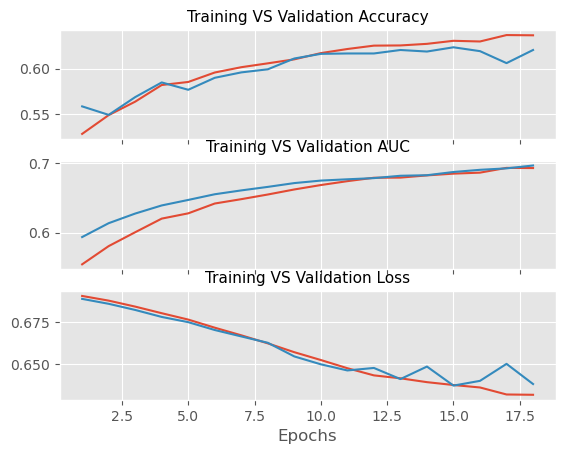

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

auc_ = history.history['auc']
val_auc = history.history['val_auc']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(1,len(acc)+1)
fig, axs = plt.subplots(3, 1)
axs[0].plot(epochs_range, acc, label='Training accuracy')
axs[0].plot(epochs_range, val_acc, label='Validation accuracy')
axs[0].set_title('Training VS Validation Accuracy', loc = 'center', size = 11)
axs[1].plot(epochs_range, auc_, label='Training AUC')
axs[1].plot(epochs_range, val_auc, label='Validation AUC')
axs[1].set_title('Training VS Validation AUC',loc = 'center', size = 11)
axs[2].plot(epochs_range, loss, label='Training Loss')
axs[2].plot(epochs_range, val_loss, label='Validation Loss')
axs[2].set_title('Training VS Validation Loss',loc = 'center', size = 11)
for ax in axs.flat:
    ax.set(xlabel='Epochs')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [52]:
test_loss, test_auc, test_acc = model.evaluate(test)
print('loss metric:',test_loss)
print('roc auc score:',test_auc)
print('accuracy score:',test_acc)



multi_dropout['SGD_auc'] = test_auc
multi_dropout['SGD_accuracy'] = test_acc
multi_dropout['SGD_loss'] = test_loss

37/37 [==============================] - 1s 36ms/step - loss: 0.5598 - auc: 0.7963 - accuracy: 0.7095
loss metric: 0.5598443150520325
roc auc score: 0.7962784171104431
accuracy score: 0.7094709873199463


In [67]:
m = pd.DataFrame((multi_dropout), index = [0]).T.reset_index().rename(columns = {'index': 'model_metric', 0:'score'})
m['parameter'] = 'multi layer dropout'

d = pd.DataFrame((dropout), index = [0]).T.reset_index().rename(columns = {'index': 'model_metric', 0:'score'})
d['parameter'] = 'dropout'

n = pd.DataFrame((non_multi), index = [0]).T.reset_index().rename(columns = {'index': 'model_metric', 0:'score'})
n['parameter'] = 'non mulit layer'

In [73]:
results_model = pd.concat([m,n,d], axis = 0).sort_values(by = 'score', ascending = False).reset_index(drop = True)
results_model

,model_metric,score,parameter
0,adam_auc,0.880539,multi layer dropout
1,rmsprop_auc,0.879635,multi layer dropout
2,adam_accuracy,0.806741,multi layer dropout
3,rmsprop_accuracy,0.800341,multi layer dropout
4,SGD_auc,0.796278,multi layer dropout
5,rmsprop_loss,0.794091,dropout
6,adam_auc,0.787996,dropout
7,rmsprop_loss,0.784600,multi layer dropout
8,adam_auc,0.781009,non mulit layer
9,rmsprop_auc,0.777285,dropout


# Pre Trained Model

In [10]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions
from tensorflow.keras import Model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [11]:
pre = InceptionV3(input_shape = (img_width, img_height, 3), include_top = False, weights = None)

In [12]:
pre.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 127, 127, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 127, 127, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

 batch_normalization_99 (BatchN  (None, 29, 29, 64)  192         ['conv2d_99[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_101 (Batch  (None, 29, 29, 64)  192         ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 29, 29, 96)  288         ['conv2d_104[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 29, 29, 32)  96          ['conv2d_105[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_116 (Batch  (None, 29, 29, 64)  192         ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 29, 29, 64)   0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_114 (Conv2D)            (None, 29, 29, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_117 (Conv2D)            (None, 29, 29, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 14, 14, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 14, 14, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_128 (Conv2D)            (None, 14, 14, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 14, 14, 128)  384        ['conv2d_128[0][0]']             
 Normaliza

                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_138 (Conv2D)            (None, 14, 14, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_138 (Batch  (None, 14, 14, 160)  480        ['conv2d_138[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 14, 14, 160)  0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_139 (Conv2D)            (None, 14, 14, 160)  179200      ['activation_138[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 14, 14, 160)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 conv2d_149 (Conv2D)            (None, 14, 14, 160)  179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_149 (Batch  (None, 14, 14, 160)  480        ['conv2d_149[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 14, 14, 160)  0           ['batch_normalization_149[0][0]']
          

                                                                                                  
 batch_normalization_159 (Batch  (None, 14, 14, 192)  576        ['conv2d_159[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 14, 14, 192)  0           ['batch_normalization_159[0][0]']
                                                                                                  
 conv2d_155 (Conv2D)            (None, 14, 14, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_160 (Conv2D)            (None, 14, 14, 192)  258048      ['activation_159[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_164 (Conv2D)            (None, 14, 14, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_168 (Conv2D)            (None, 14, 14, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_164 (Batch  (None, 14, 14, 192)  576        ['conv2d_164[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 14, 14, 192)  576        ['conv2d_168[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_170 (Batch  (None, 6, 6, 320)   960         ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_172[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_177[0][0]']
          

                                                                                                  
 activation_185 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_185[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 batch_normalization_187 (Batch  (None, 6, 6, 192)   576         ['conv2d_187[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 6, 6, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 

In [13]:
pre.load_weights('inception_v3_weights.h5')

In [14]:
last_layer = pre.get_layer('mixed10')
last_output = last_layer.output
i = layers.Dropout(.2)(last_output)
i = layers.Flatten()(i)
i = layers.Dense(1, activation = 'sigmoid')(i)

In [15]:
pre_model = Model(pre.input,i)

In [16]:
pre_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 127, 127, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 127, 127, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                             

 batch_normalization_99 (BatchN  (None, 29, 29, 64)  192         ['conv2d_99[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_101 (Batch  (None, 29, 29, 64)  192         ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 29, 29, 96)  288         ['conv2d_104[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 29, 29, 32)  96          ['conv2d_105[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_116 (Batch  (None, 29, 29, 64)  192         ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 29, 29, 64)   0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_114 (Conv2D)            (None, 29, 29, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_117 (Conv2D)            (None, 29, 29, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 14, 14, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 14, 14, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_128 (Conv2D)            (None, 14, 14, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 14, 14, 128)  384        ['conv2d_128[0][0]']             
 Normaliza

                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_138 (Conv2D)            (None, 14, 14, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_138 (Batch  (None, 14, 14, 160)  480        ['conv2d_138[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 14, 14, 160)  0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_139 (Conv2D)            (None, 14, 14, 160)  179200      ['activation_138[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 14, 14, 160)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 conv2d_149 (Conv2D)            (None, 14, 14, 160)  179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_149 (Batch  (None, 14, 14, 160)  480        ['conv2d_149[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 14, 14, 160)  0           ['batch_normalization_149[0][0]']
          

                                                                                                  
 batch_normalization_159 (Batch  (None, 14, 14, 192)  576        ['conv2d_159[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 14, 14, 192)  0           ['batch_normalization_159[0][0]']
                                                                                                  
 conv2d_155 (Conv2D)            (None, 14, 14, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_160 (Conv2D)            (None, 14, 14, 192)  258048      ['activation_159[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_164 (Conv2D)            (None, 14, 14, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_168 (Conv2D)            (None, 14, 14, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_164 (Batch  (None, 14, 14, 192)  576        ['conv2d_164[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 14, 14, 192)  576        ['conv2d_168[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_170 (Batch  (None, 6, 6, 320)   960         ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_172[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_177[0][0]']
          

                                                                                                  
 activation_185 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_185[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 batch_normalization_187 (Batch  (None, 6, 6, 192)   576         ['conv2d_187[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 6, 6, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 

In [17]:
lossf = tf.keras.losses.BinaryCrossentropy()

pre_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss=lossf, metrics = ['AUC' , 'accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.05, patience = 3, min_lr = 0.001)

In [18]:
history = pre_model.fit(train , epochs = 50, batch_size = 1000, callbacks=[callback,lr_callback], validation_data = val)

Epoch 1/50
293/293 [==============================] - 163s 504ms/step - loss: 0.8850 - auc: 0.7077 - accuracy: 0.6359 - val_loss: 12628.9043 - val_auc: 0.6825 - val_accuracy: 0.5754 - lr: 0.0010
Epoch 2/50
293/293 [==============================] - 148s 506ms/step - loss: 0.3125 - auc: 0.9599 - accuracy: 0.8954 - val_loss: 4.1398 - val_auc: 0.9426 - val_accuracy: 0.8936 - lr: 0.0010
Epoch 3/50
293/293 [==============================] - 152s 519ms/step - loss: 0.1479 - auc: 0.9876 - accuracy: 0.9451 - val_loss: 12.5521 - val_auc: 0.8889 - val_accuracy: 0.8300 - lr: 0.0010
Epoch 4/50
293/293 [==============================] - 152s 518ms/step - loss: 0.1132 - auc: 0.9923 - accuracy: 0.9564 - val_loss: 4.8146 - val_auc: 0.9511 - val_accuracy: 0.9223 - lr: 0.0010
Epoch 5/50
293/293 [==============================] - 153s 522ms/step - loss: 0.0937 - auc: 0.9944 - accuracy: 0.9660 - val_loss: 0.5387 - val_auc: 0.9678 - val_accuracy: 0.9120 - lr: 0.0010
Epoch 6/50
293/293 [====================

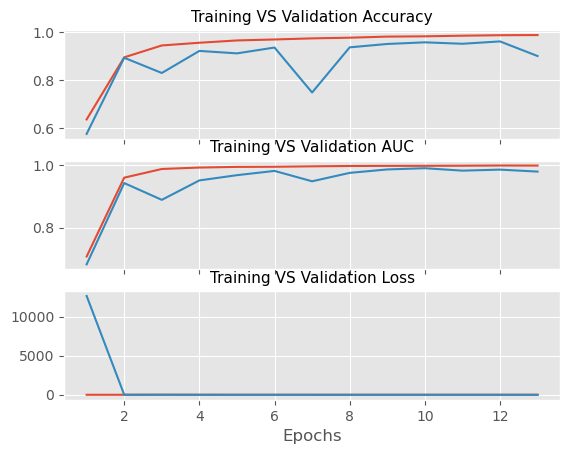

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

auc_ = history.history['auc']
val_auc = history.history['val_auc']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(1,len(acc)+1)
fig, axs = plt.subplots(3, 1)
axs[0].plot(epochs_range, acc, label='Training accuracy')
axs[0].plot(epochs_range, val_acc, label='Validation accuracy')
axs[0].set_title('Training VS Validation Accuracy', loc = 'center', size = 11)
axs[1].plot(epochs_range, auc_, label='Training AUC')
axs[1].plot(epochs_range, val_auc, label='Validation AUC')
axs[1].set_title('Training VS Validation AUC',loc = 'center', size = 11)
axs[2].plot(epochs_range, loss, label='Training Loss')
axs[2].plot(epochs_range, val_loss, label='Validation Loss')
axs[2].set_title('Training VS Validation Loss',loc = 'center', size = 11)
for ax in axs.flat:
    ax.set(xlabel='Epochs')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [20]:
test_loss, test_auc, test_acc = pre_model.evaluate(test)
print('loss metric:',test_loss)
print('roc auc score:',test_auc)
print('accuracy score:',test_acc)

pre_built = {}

pre_built['rmsprop_auc'] = test_auc
pre_built['rmsprop_accuracy'] = test_acc
pre_built['rmsprop_loss'] = test_loss

37/37 [==============================] - 5s 141ms/step - loss: 0.3808 - auc: 0.9783 - accuracy: 0.8669
loss metric: 0.3807603716850281
roc auc score: 0.9782548546791077
accuracy score: 0.8668941855430603


In [21]:
lossf = tf.keras.losses.BinaryCrossentropy()

pre_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=lossf, metrics = ['AUC' , 'accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.05, patience = 3, min_lr = 0.001)

In [22]:
history = pre_model.fit(train , epochs = 50, batch_size = 1000, callbacks=[callback,lr_callback], validation_data = val)

Epoch 1/50
293/293 [==============================] - 149s 494ms/step - loss: 0.0365 - auc: 0.9986 - accuracy: 0.9877 - val_loss: 2.4610 - val_auc: 0.9722 - val_accuracy: 0.9257 - lr: 0.0010
Epoch 2/50
293/293 [==============================] - 145s 493ms/step - loss: 0.0296 - auc: 0.9992 - accuracy: 0.9894 - val_loss: 0.5101 - val_auc: 0.9644 - val_accuracy: 0.8851 - lr: 0.0010
Epoch 3/50
293/293 [==============================] - 145s 493ms/step - loss: 1.5737 - auc: 0.7132 - accuracy: 0.6425 - val_loss: 2.3680 - val_auc: 0.7434 - val_accuracy: 0.6801 - lr: 0.0010
Epoch 4/50
293/293 [==============================] - 144s 490ms/step - loss: 0.7756 - auc: 0.8593 - accuracy: 0.7812 - val_loss: 0.4568 - val_auc: 0.8953 - val_accuracy: 0.7732 - lr: 0.0010
Epoch 5/50
293/293 [==============================] - 144s 490ms/step - loss: 0.7265 - auc: 0.8901 - accuracy: 0.8142 - val_loss: 3.5059 - val_auc: 0.8673 - val_accuracy: 0.7924 - lr: 0.0010
Epoch 6/50
293/293 [=========================

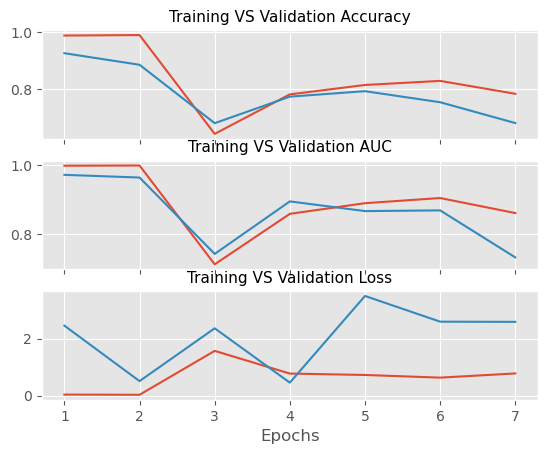

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

auc_ = history.history['auc']
val_auc = history.history['val_auc']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(1,len(acc)+1)
fig, axs = plt.subplots(3, 1)
axs[0].plot(epochs_range, acc, label='Training accuracy')
axs[0].plot(epochs_range, val_acc, label='Validation accuracy')
axs[0].set_title('Training VS Validation Accuracy', loc = 'center', size = 11)
axs[1].plot(epochs_range, auc_, label='Training AUC')
axs[1].plot(epochs_range, val_auc, label='Validation AUC')
axs[1].set_title('Training VS Validation AUC',loc = 'center', size = 11)
axs[2].plot(epochs_range, loss, label='Training Loss')
axs[2].plot(epochs_range, val_loss, label='Validation Loss')
axs[2].set_title('Training VS Validation Loss',loc = 'center', size = 11)
for ax in axs.flat:
    ax.set(xlabel='Epochs')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [24]:
test_loss, test_auc, test_acc = pre_model.evaluate(test)
print('loss metric:',test_loss)
print('roc auc score:',test_auc)
print('accuracy score:',test_acc)



pre_built['adam_auc'] = test_auc
pre_built['adam_accuracy'] = test_acc
pre_built['adam_loss'] = test_loss

37/37 [==============================] - 5s 131ms/step - loss: 4.9769 - auc: 0.7406 - accuracy: 0.6792
loss metric: 4.9768853187561035
roc auc score: 0.7405861616134644
accuracy score: 0.6791808605194092


In [25]:
p = pd.DataFrame((pre_built), index = [0]).T.reset_index().rename(columns = {'index': 'model_metric', 0:'score'})
p['parameter'] = 'prebuilt'

In [28]:
p

,model_metric,score,parameter
0,rmsprop_auc,0.978255,prebuilt
1,rmsprop_accuracy,0.866894,prebuilt
2,rmsprop_loss,0.380760,prebuilt
3,adam_auc,0.740586,prebuilt
4,adam_accuracy,0.679181,prebuilt
5,adam_loss,4.976885,prebuilt
